In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_excel('DataSets/new users.xlsx',index_col='Month', parse_dates=True)
df.head()

,New Users
Month,
2010-01-01,560
2010-02-01,590
2010-03-01,660
2010-04-01,645
2010-05-01,605


<AxesSubplot:xlabel='Month'>

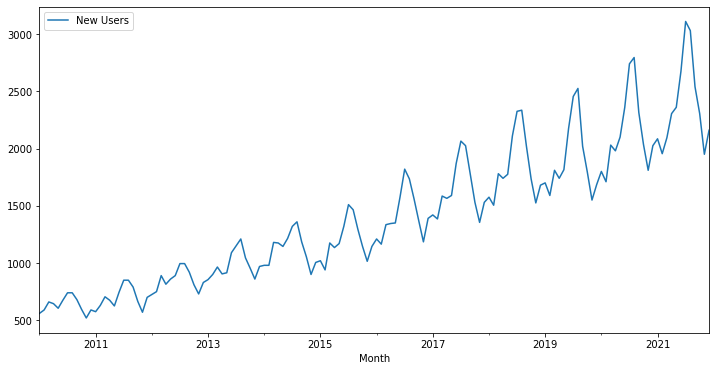

In [3]:
df[['New Users']].plot(figsize = (12,6))

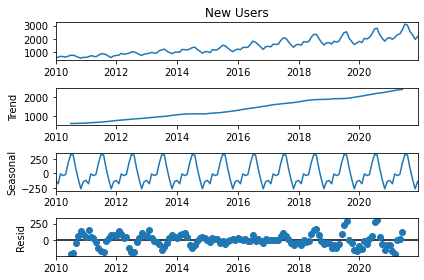

In [4]:
decompose_result = seasonal_decompose(df["New Users"])
decompose_result.plot();

In [5]:
df.index.freq = "MS"
alpha = 0.2

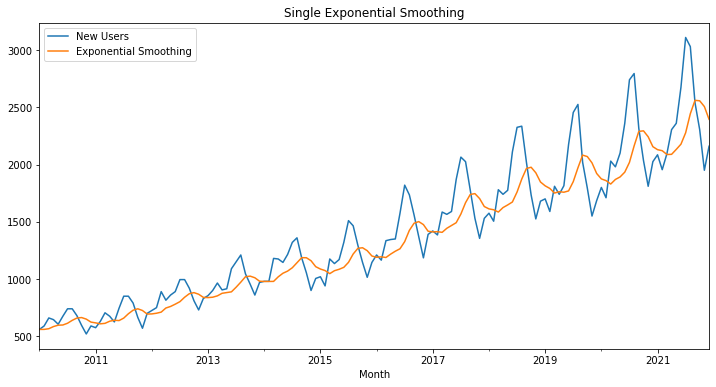

In [6]:
# Single Exponential Smoothing 
df["Exponential Smoothing"] = SimpleExpSmoothing(df["New Users"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[["New Users","Exponential Smoothing"]].plot(title="Single Exponential Smoothing",figsize = (12,6));

# התחזית של החלקה מעריכית יחידה לא מתאימה.  היא לא מתחשבת בעונתיות

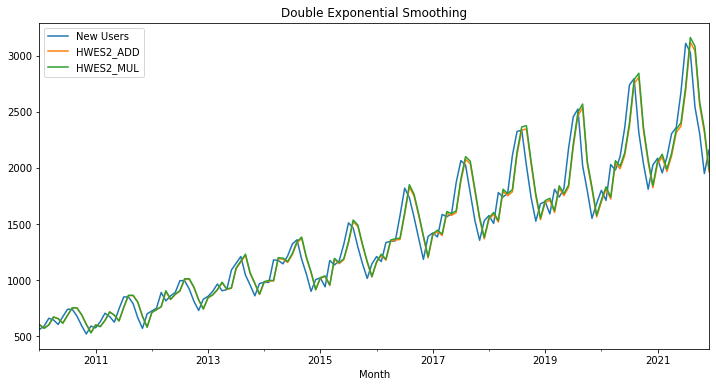

In [7]:
# Double Exponential Smoothing # שיטת הולט
df["HWES2_ADD"] = ExponentialSmoothing(df["New Users"],trend="add").fit().fittedvalues
df["HWES2_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul").fit().fittedvalues
df[["New Users","HWES2_ADD","HWES2_MUL"]].plot(title="Double Exponential Smoothing",figsize = (12,6));

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


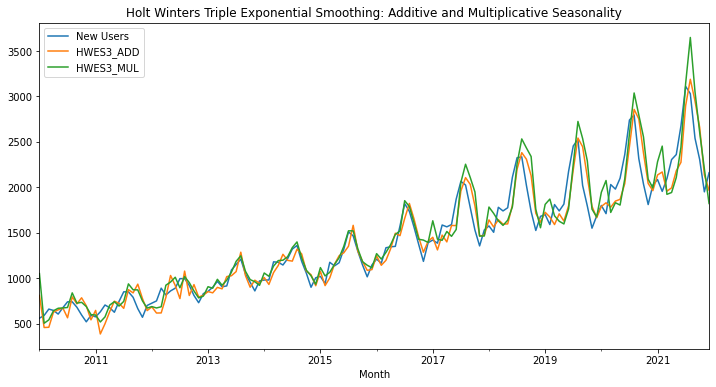

In [8]:
# Triple Exponential Smoothing # שיטת וינטרס

df["HWES3_ADD"] = ExponentialSmoothing(df["New Users"],trend="add",seasonal="add",seasonal_periods=55).fit().fittedvalues
df["HWES3_MUL"] = ExponentialSmoothing(df["New Users"],trend="mul",seasonal="mul",seasonal_periods=55).fit().fittedvalues
df[["New Users","HWES3_ADD","HWES3_MUL"]].plot(title="Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality",figsize = (12,6));



In [9]:
df.shape

(144, 6)

In [10]:
forecast_data = pd.read_excel("DataSets/new users.xlsx",index_col='Month',parse_dates=True)
forecast_data.index.freq = "MS"

train_df = forecast_data[:120] # נתונים ראשונים
test_df = forecast_data[120:] # נתונים אחרונים

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

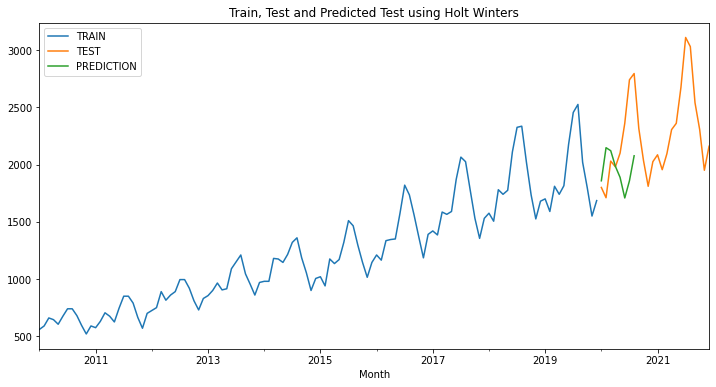

In [11]:
# תחזית
fitted_model = ExponentialSmoothing(train_df["New Users"],trend="mul",seasonal="mul",seasonal_periods=55).fit()
test_predictions = fitted_model.forecast(8)
train_df["New Users"].plot(legend=True,label="TRAIN",figsize = (12,6))
test_df["New Users"].plot(legend=True,label="TEST",figsize = (12,6))
test_predictions.plot(legend=True,label="PREDICTION",figsize = (12,6))
plt.title("Train, Test and Predicted Test using Holt Winters")

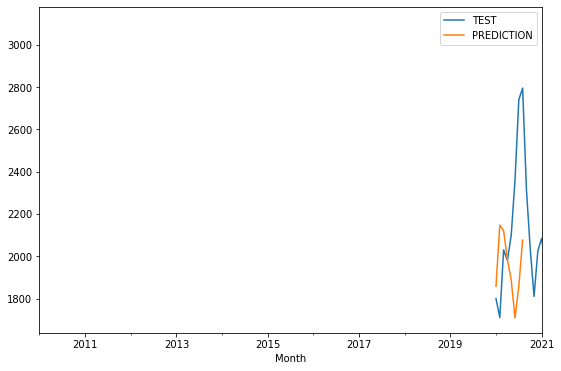

In [12]:
test_df["New Users"].plot(legend=True,label="TEST",figsize=(9,6))
test_predictions.plot(legend=True,label="PREDICTION",xlim=["2010-01-01","2021-01-01"]);